# Reconocimiento de las señales de tráfico

In [133]:
import tensorflow as tf
import os
import skimage.data as imd

In [23]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [17]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [24]:
images, labels = load_ml_data(train_data_dir)

In [28]:
import numpy as np

In [29]:
images = np.array(images)

In [30]:
labels = np.array(labels)

In [34]:
images.ndim

1

In [35]:
images.size

4575

In [36]:
images[0]

array([[[ 47,  52,  59],
        [ 35,  64,  72],
        [ 53, 104, 112],
        ...,
        [ 75,  82,  60],
        [ 72,  77,  55],
        [ 68,  71,  50]],

       [[ 46,  51,  57],
        [ 38,  66,  74],
        [ 58, 109, 115],
        ...,
        [ 74,  84,  62],
        [ 76,  84,  62],
        [ 76,  83,  61]],

       [[ 44,  50,  56],
        [ 44,  71,  79],
        [ 59, 109, 115],
        ...,
        [ 71,  83,  61],
        [ 74,  84,  63],
        [ 75,  84,  63]],

       ...,

       [[120, 141, 139],
        [119, 144, 138],
        [114, 141, 131],
        ...,
        [ 33,  30,  27],
        [ 32,  30,  28],
        [ 30,  30,  28]],

       [[133, 151, 145],
        [124, 146, 138],
        [111, 137, 127],
        ...,
        [ 31,  30,  25],
        [ 32,  32,  27],
        [ 33,  33,  30]],

       [[139, 158, 147],
        [124, 146, 137],
        [107, 132, 123],
        ...,
        [ 31,  30,  23],
        [ 33,  33,  27],
        [ 35,  36,  31]]

In [37]:
labels.ndim

1

In [38]:
labels.size

4575

In [41]:
len(set(labels))

62

In [45]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [46]:
images.itemsize

8

In [47]:
images.nbytes

36600

In [48]:
images.nbytes/images.itemsize

4575.0

In [49]:
import matplotlib.pyplot as plt

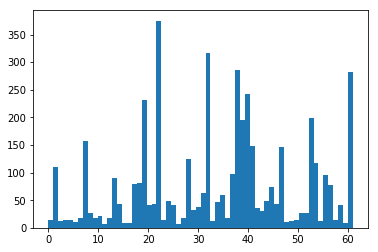

In [51]:
plt.hist(labels, len(set(labels)))
plt.show()

In [52]:
import random

In [59]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[685, 656, 4460, 2115, 753, 2026]

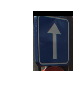

Forma:(295, 194, 3), min:0, max:255


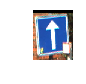

Forma:(134, 107, 3), min:0, max:255


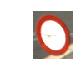

Forma:(107, 88, 3), min:15, max:255


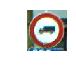

Forma:(63, 61, 3), min:0, max:255


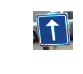

Forma:(142, 143, 3), min:5, max:255


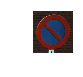

Forma:(208, 196, 3), min:0, max:255


In [60]:

for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

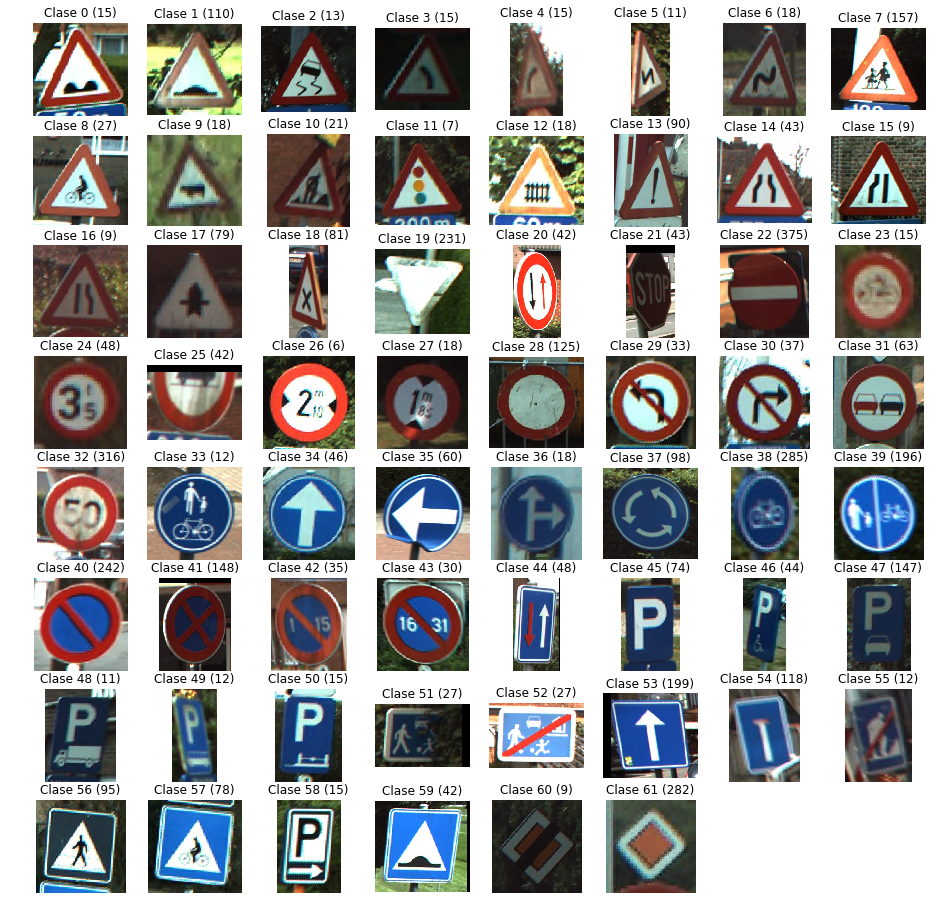

In [67]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [62]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [68]:
from skimage import transform

In [75]:
w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [76]:
images30 = [transform.resize(image, (30,30)) for image in images]

/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [77]:
images30[0]

array([[[0.22186275, 0.40480392, 0.4295098 ],
        [0.42978431, 0.54390196, 0.53941176],
        [0.44313725, 0.54921569, 0.53343137],
        ...,
        [0.26784314, 0.29166667, 0.2227451 ],
        [0.2385098 , 0.26913725, 0.19303922],
        [0.28131373, 0.32641176, 0.24066667]],

       [[0.21217647, 0.39062745, 0.40141176],
        [0.43011765, 0.55227451, 0.54468627],
        [0.44098039, 0.53431373, 0.49598039],
        ...,
        [0.3272549 , 0.34117647, 0.27245098],
        [0.29258824, 0.32743137, 0.24454902],
        [0.28129412, 0.32186275, 0.23892157]],

       [[0.26254902, 0.45235294, 0.47558824],
        [0.45901961, 0.58      , 0.55627451],
        [0.45882353, 0.5377451 , 0.51421569],
        ...,
        [0.35686275, 0.31421569, 0.25343137],
        [0.34009804, 0.29872549, 0.25539216],
        [0.33205882, 0.30039216, 0.27931373]],

       ...,

       [[0.39833333, 0.52656863, 0.50019608],
        [0.42921569, 0.55666667, 0.52352941],
        [0.43676471, 0

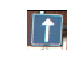

Forma:(30, 30, 3), min:0.0, max:1.0


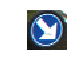

Forma:(30, 30, 3), min:0.007679738562091434, max:1.0


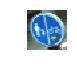

Forma:(30, 30, 3), min:0.06049673202614374, max:1.0


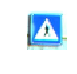

Forma:(30, 30, 3), min:0.027058823529411014, max:1.0


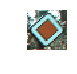

Forma:(30, 30, 3), min:0.08264705882352935, max:1.0


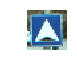

Forma:(30, 30, 3), min:0.0250544662309374, max:1.0


In [78]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [79]:
from skimage.color import rgb2gray

In [80]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

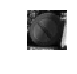

Forma:(30, 30), min:0.06301411764705889, max:0.45012734204793026


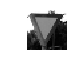

Forma:(30, 30), min:0.09323434705882355, max:1.0


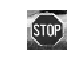

Forma:(30, 30), min:0.06734857254902021, max:0.9977252705882356


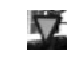

Forma:(30, 30), min:0.10074813725490347, max:0.9995878692810457


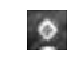

Forma:(30, 30), min:0.1509591947712407, max:0.6538949019607846


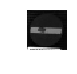

Forma:(30, 30), min:0.06006807843137262, max:0.7628359999999998


In [82]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [83]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [86]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [87]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [88]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [89]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [123]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

EPOCH 0
Eficacia:  20.233006
EPOCH 50
Eficacia:  34.662952
EPOCH 100
Eficacia:  35.607433
EPOCH 150
Eficacia:  35.32743
EPOCH 200
Eficacia:  35.12153
EPOCH 250
Eficacia:  35.051365
EPOCH 300
Eficacia:  34.93071
EPOCH 350
Eficacia:  34.83563
EPOCH 400
Eficacia:  34.782295
EPOCH 450
Eficacia:  34.73683
EPOCH 500
Eficacia:  34.62295
EPOCH 550
Eficacia:  34.54973
EPOCH 600
Eficacia:  34.482624


# Evaluación de la red neuronal

In [106]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [125]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [126]:
prediction

array([54, 61, 39, 32, 39, 41, 57, 53, 40, 54, 32,  7, 32,  7, 38, 40, 40,
       40, 19, 22, 38, 61, 22, 25,  7, 22,  7, 22, 25, 19, 40,  7, 19, 40,
       53, 40, 13, 32, 32, 40])

In [127]:
sample_labels

[54,
 30,
 39,
 32,
 39,
 41,
 57,
 53,
 47,
 54,
 32,
 7,
 32,
 7,
 36,
 40,
 40,
 51,
 46,
 28,
 38,
 61,
 22,
 46,
 7,
 35,
 9,
 22,
 25,
 45,
 41,
 7,
 50,
 30,
 34,
 40,
 13,
 32,
 32,
 40]

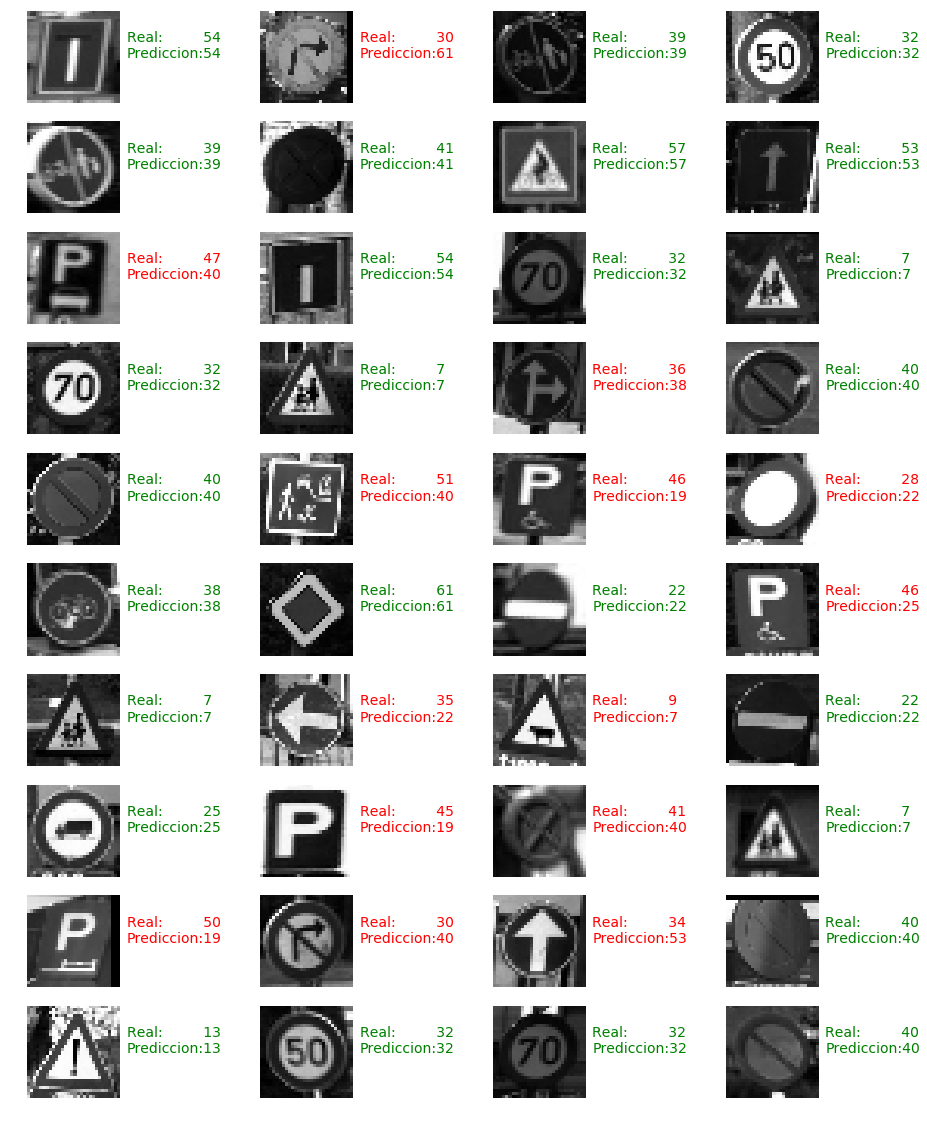

In [128]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [113]:
test_images, test_labels = load_ml_data(test_data_dir)

In [114]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [116]:
test_images30 = rgb2gray(np.array(test_images30))

In [129]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [130]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1675

In [131]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 66.47
